In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear in the notebook
%matplotlib inline

# Load the dataset from the data/ folder
data_path = "../data/resume_data.csv" 
df = pd.read_csv(data_path)

# Inspect the first few rows
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [2]:


#drop the resume_html column
df.drop(columns=['Resume_html'], inplace=True)

# Check the shape of the dataset
print("Dataset shape:", df.shape)
print("")

# Show column names and data types
df.info()
print("")

# Check basic descriptive stats (numerical columns only)
df.describe()
print("")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

#Number of unique values in each category column
print("Unique values per column:")
print(df['Category'].nunique())
print(df['Category'].unique())



Dataset shape: (2484, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          2484 non-null   int64 
 1   Resume_str  2484 non-null   object
 2   Category    2484 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


Missing values per column:
ID            0
Resume_str    0
Category      0
dtype: int64
Unique values per column:
24
['HR' 'DESIGNER' 'INFORMATION-TECHNOLOGY' 'TEACHER' 'ADVOCATE'
 'BUSINESS-DEVELOPMENT' 'HEALTHCARE' 'FITNESS' 'AGRICULTURE' 'BPO' 'SALES'
 'CONSULTANT' 'DIGITAL-MEDIA' 'AUTOMOBILE' 'CHEF' 'FINANCE' 'APPAREL'
 'ENGINEERING' 'ACCOUNTANT' 'CONSTRUCTION' 'PUBLIC-RELATIONS' 'BANKING'
 'ARTS' 'AVIATION']


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


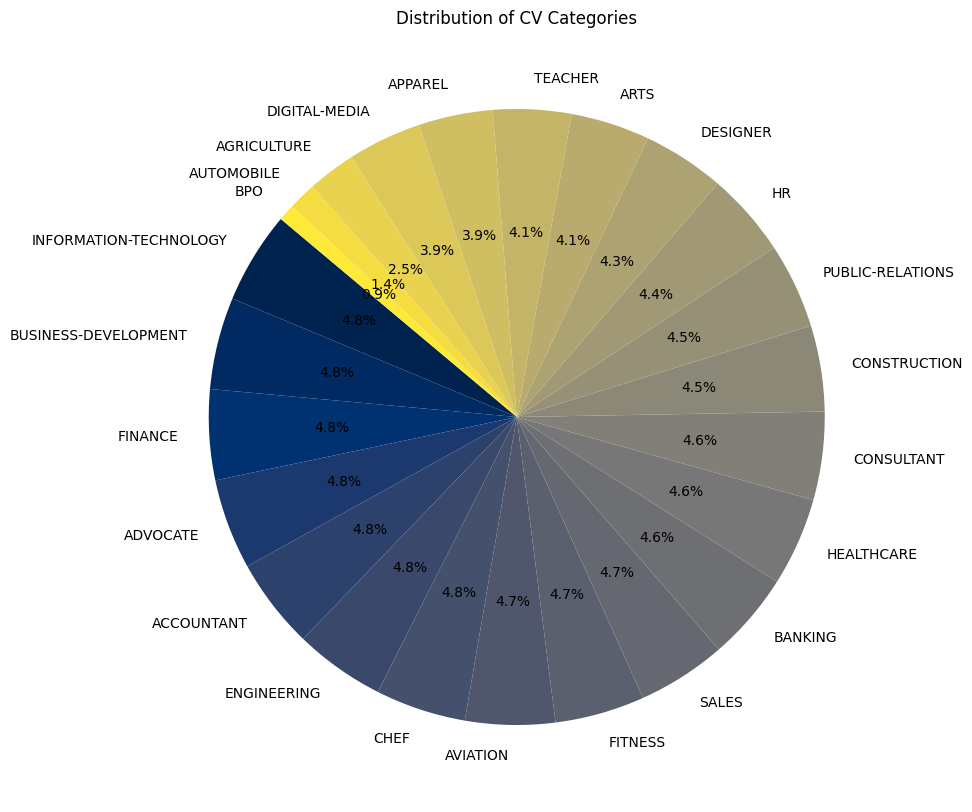

In [3]:
# Count how many resumes per category
category_counts = df["Category"].value_counts()
print(category_counts)

# Quick pie chart of category distribution with percentages
plt.figure(figsize=(10, 10))
category_counts.plot.pie(autopct='%1.1f%%', startangle=140, cmap='cividis', legend=False)
plt.title("Distribution of CV Categories")
plt.ylabel("")  # Remove the y-label
plt.show()


In [4]:
# Filter out categories with less than 90 resumes
valid_categories = category_counts[category_counts >= 90].index
df = df[df['Category'].isin(valid_categories)]

print("Updated dataset shape:", df.shape)
print("Remaining categories:", df['Category'].value_counts())

Updated dataset shape: (2363, 3)
Remaining categories: Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
CHEF                      118
FINANCE                   118
ENGINEERING               118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
Name: count, dtype: int64


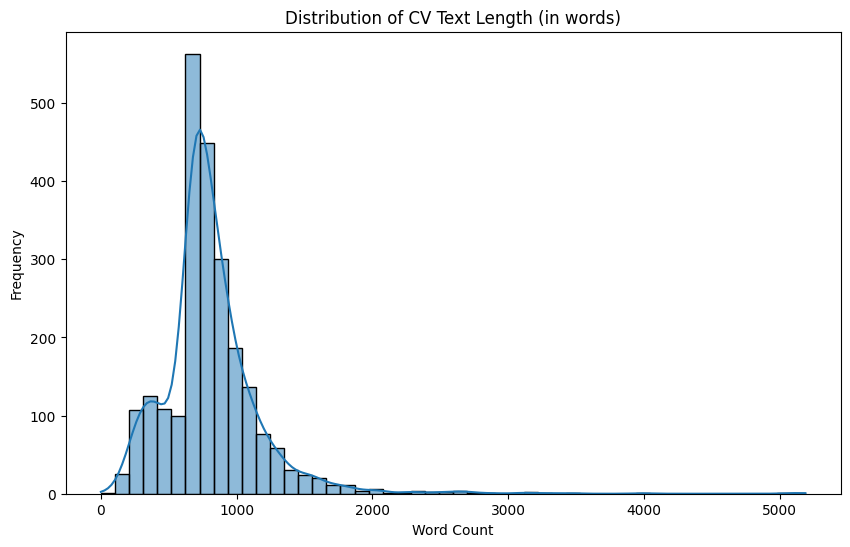

count    2363.000000
mean      808.657639
std       370.355389
min         0.000000
25%       650.000000
50%       755.000000
75%       931.000000
max      5190.000000
Name: resume_length, dtype: float64

In [5]:
# Calculate the length of each CV in terms of word count
df["resume_length"] = df["Resume_str"].apply(lambda x: len(str(x).split()))

# Plot the distribution of CV text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="resume_length", bins=50, kde=True)
plt.title("Distribution of CV Text Length (in words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Display descriptive statistics about the CV lengths
df["resume_length"].describe()

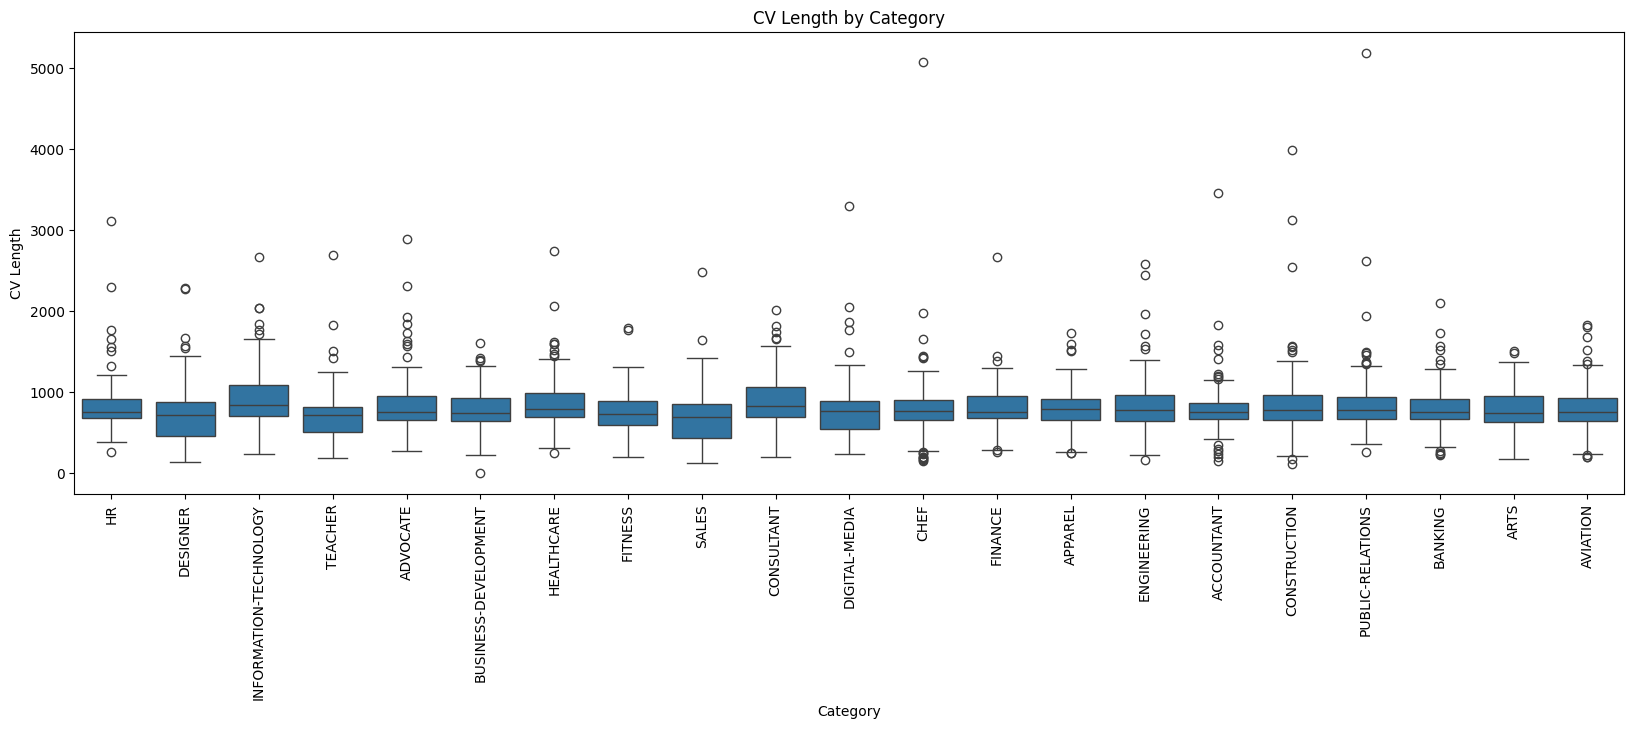

In [6]:
# boxplot to show the distribution of CV lengths by category
plt.figure(figsize=(20, 6))
sns.boxplot(x='Category', y='resume_length', data=df)
plt.xlabel('Category')
plt.ylabel('CV Length')
plt.title('CV Length by Category')
plt.xticks(rotation=90)
plt.show()


# Final data cleaning

In [7]:
# Define thresholds based on descriptive statistics
min_threshold = 1  # Remove resumes with 0 words
max_threshold = 2000  # Example threshold for very long resumes

# Filter the dataset
df = df[(df["resume_length"] >= min_threshold) & (df["resume_length"] <= max_threshold)]

# Check the updated dataset shape
print("Updated dataset shape:", df.shape)

# Convert the 'Resume_str' column to lowercase
df["Resume_str"] = df["Resume_str"].str.lower()

import re
# Replace special characters, punctuation, and numbers with whitespace in the 'Resume_str' column
df['Resume_str'] = df['Resume_str'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', ' ', x))

# Check the updated dataset shape and first few rows
df.head()

Updated dataset shape: (2335, 4)


,ID,Resume_str,Category,resume_length
0,16852973,hr administrator marketing associate\...,HR,674
1,22323967,hr specialist us hr operations ...,HR,708
2,33176873,hr director summary over ...,HR,1017
3,27018550,hr specialist summary dedica...,HR,379
4,17812897,hr manager skill highlights ...,HR,1206


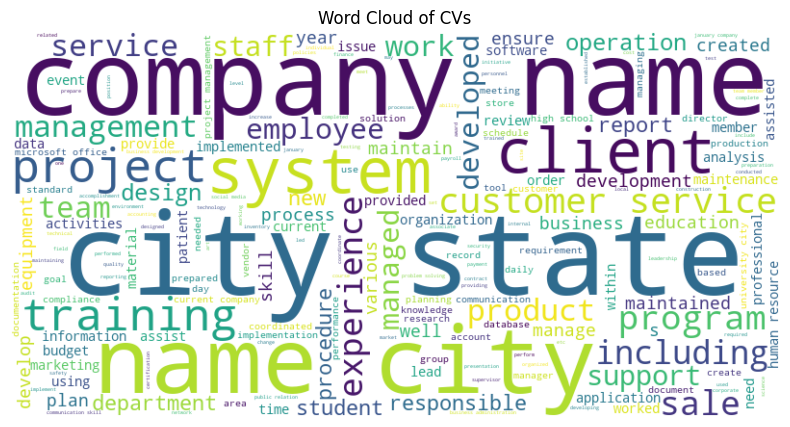

In [8]:
# Import the WordCloud module
from wordcloud import WordCloud

# Combine all cv texts into a single string
text = ' '.join(df['Resume_str'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of CVs')
plt.show()

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess_cv(doc):
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and len(token.lemma_) > 1])

# adjust n_process based on your CPU
processed_texts = [preprocess_cv(doc) for doc in nlp.pipe(df['Resume_str'], batch_size=100, n_process=6)]

df['processed_resume'] = processed_texts

print(df['processed_resume'].head())

0              hr administrator marketing associate...
1              hr specialist hr operation        su...
2              hr director        summary          ...
3              hr specialist        summary     ded...
4              hr manager          skill highlight ...
Name: processed_resume, dtype: object


Another word cloud after processing the text, all lower case, remove punctuation, removing default stop words

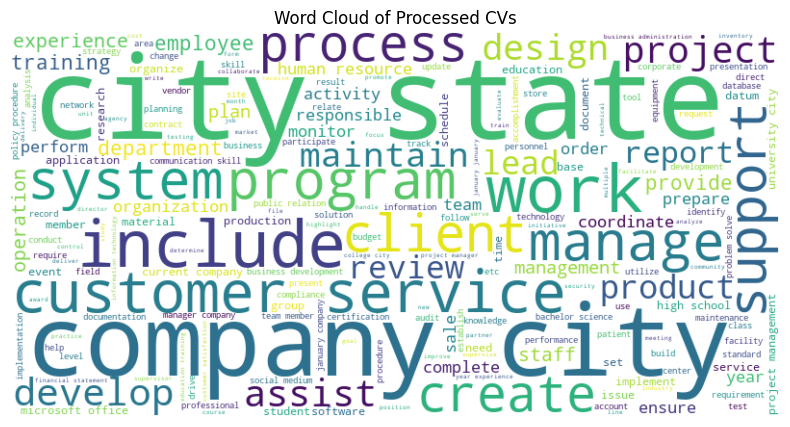

In [10]:
# Combine all processed resume texts into a single string
processed_text = ' '.join(df['processed_resume'])

# Generate a word cloud image from the processed text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Processed CVs')
plt.show()



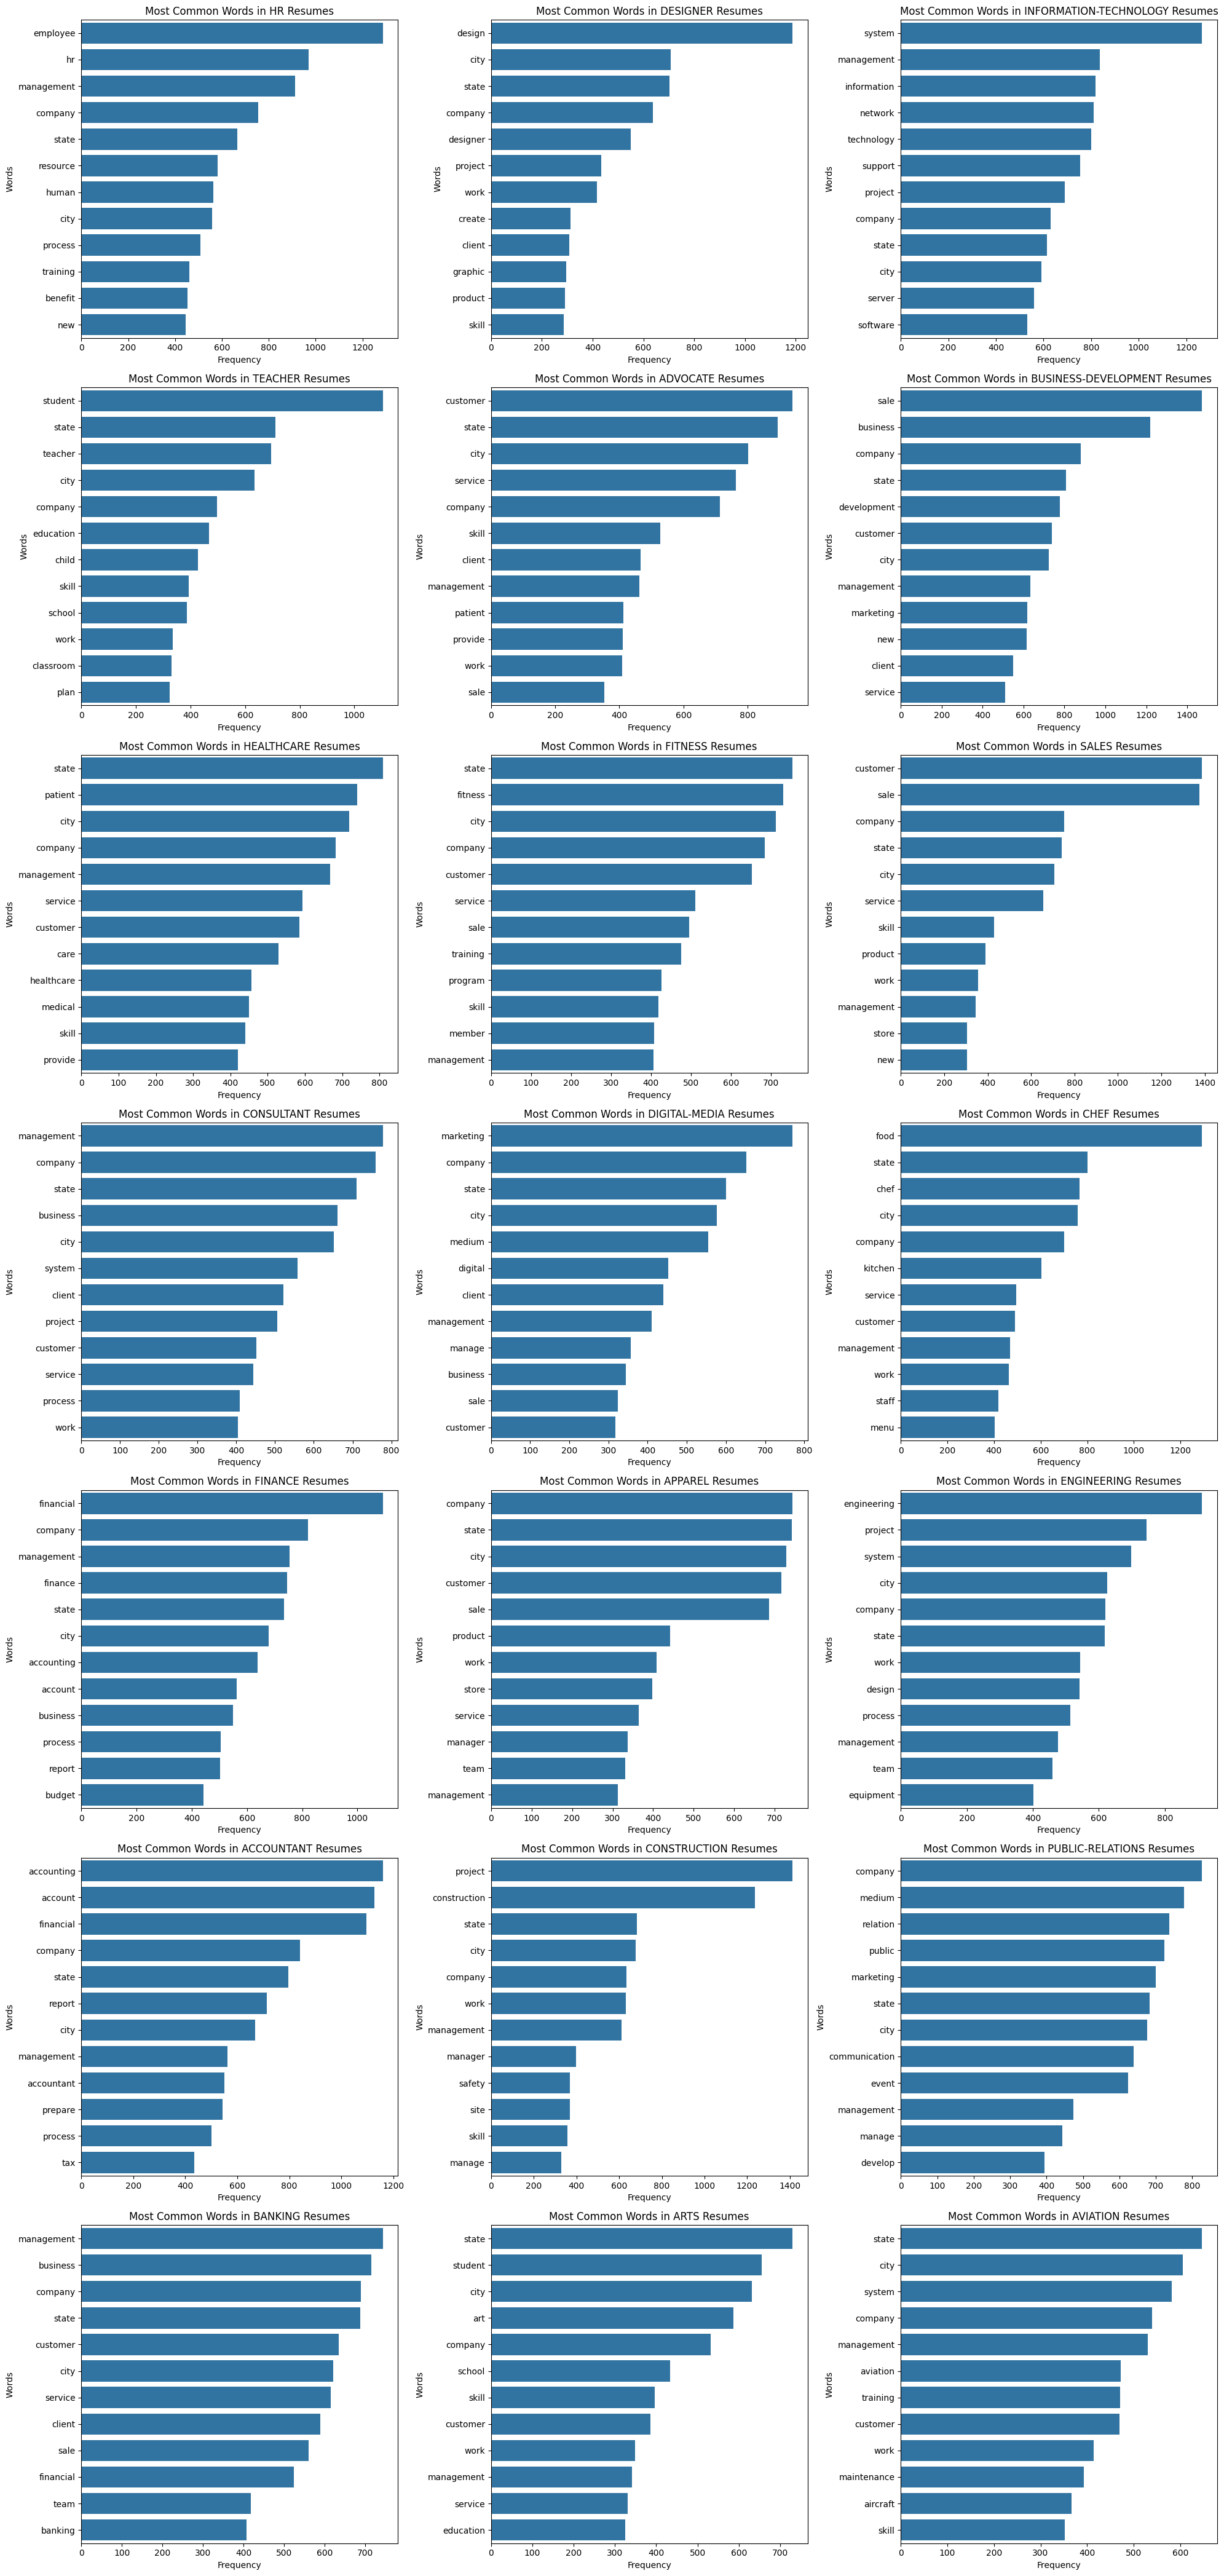

In [11]:
from collections import Counter

# Count the frequency of each word for each category
category_word_counts = {}
for category in df['Category'].unique():
    category_text = ' '.join(df[df['Category'] == category]['processed_resume'])
    tokens = category_text.split()
    category_word_counts[category] = Counter(tokens)

# Plot the most common words for each category using a grid of bar plots
num_categories = len(category_word_counts)
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, (category, word_count) in enumerate(category_word_counts.items()):
    common_words = word_count.most_common(12)
    words, counts = zip(*common_words)
    
    sns.barplot(x=list(counts), y=list(words), ax=axes[i])
    axes[i].set_title(f"Most Common Words in {category} Resumes")
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel("Words")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


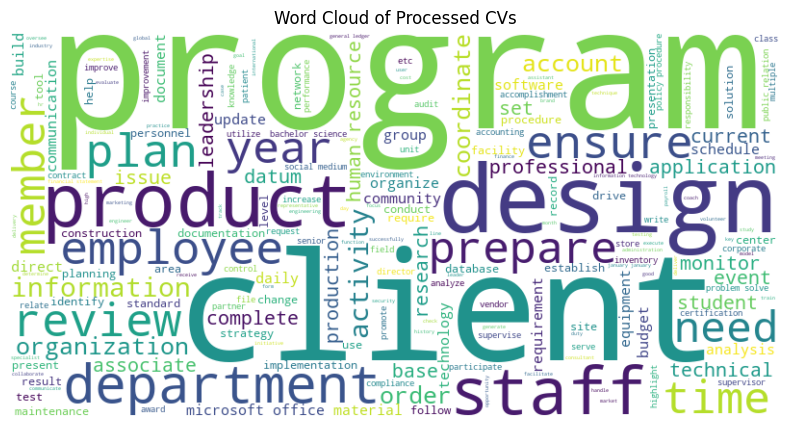

In [12]:
# Define custom stopwords
custom_stopwords = {
    "customer", "skill", "experience", "include", "provide", "responsible", 
    "manager", "business", "development", "training", "manage", "maintain", 
    "support", "create", "develop", "assist", "perform", "implement", 
    "system", "project", "service", "team", "work", "process", "operation", "report", 
    "lead", "new", "city", "state", "company", "position", "job", "role", "resume",
    "education", "degree", "graduate", "university", "college", "school", "management", "sale"
}

# Remove custom stopwords during preprocessing
df['processed_resume'] = df['processed_resume'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in custom_stopwords])
)

# Combine all processed resume texts into a single string
processed_text = ' '.join(df['processed_resume'])

# Generate the word cloud image from the processed text
wordcloud_processed = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Display the word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_processed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed CVs')
plt.show()

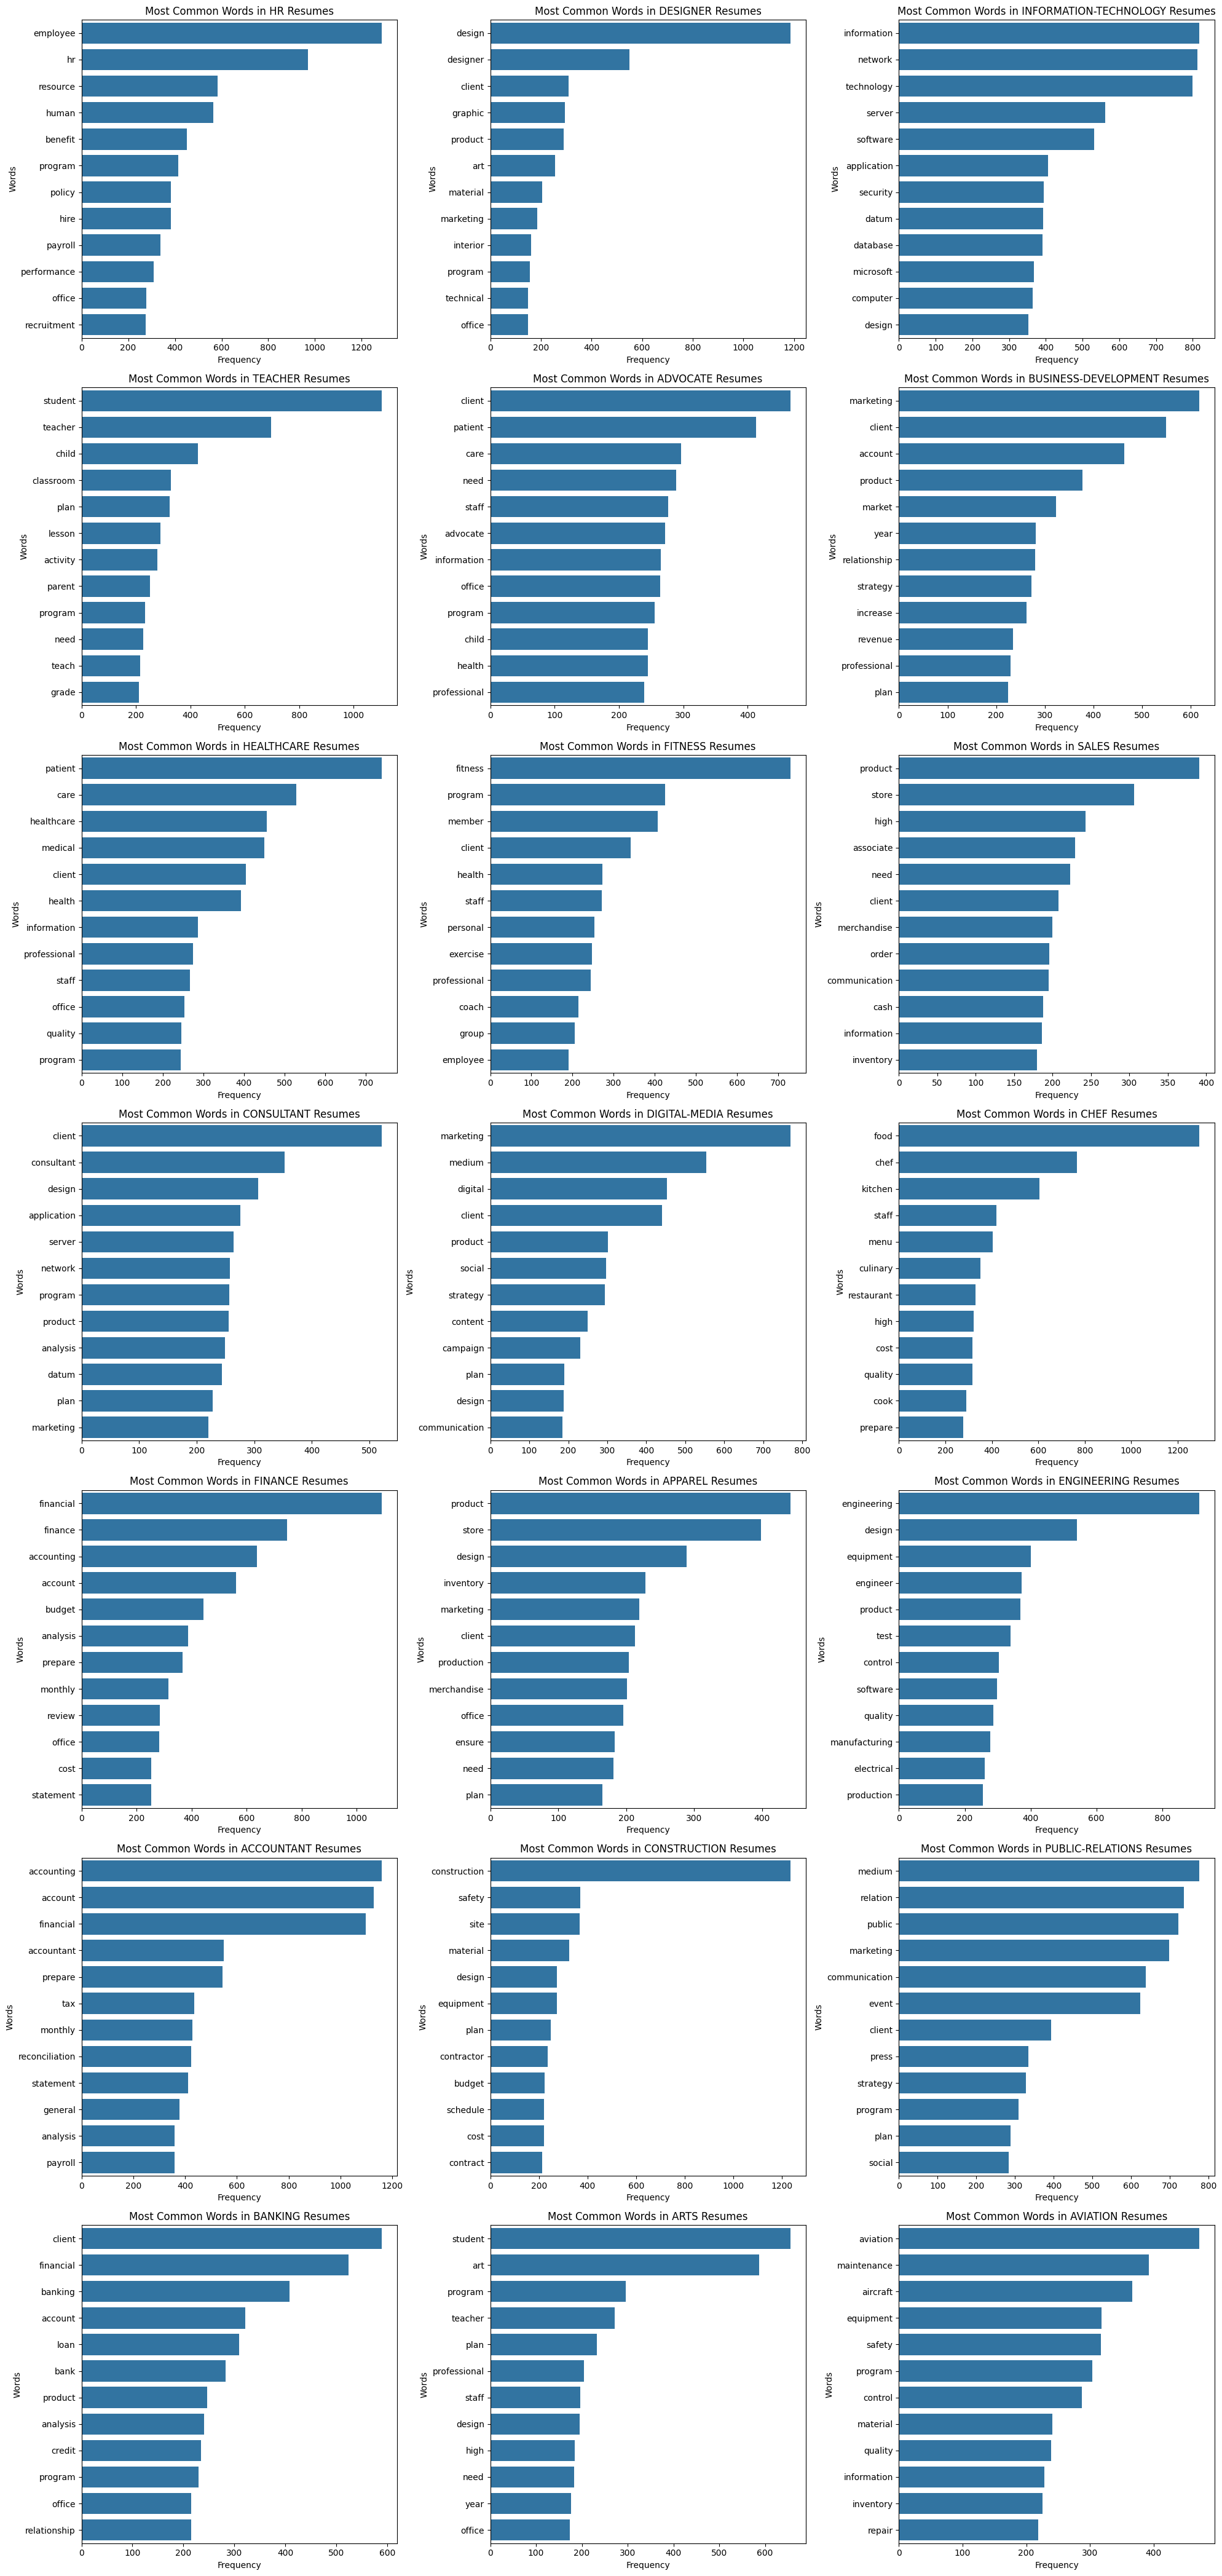

In [13]:
from collections import Counter

# Count the frequency of each word for each category
category_word_counts = {}
for category in df['Category'].unique():
    category_text = ' '.join(df[df['Category'] == category]['processed_resume'])
    tokens = category_text.split()
    category_word_counts[category] = Counter(tokens)

# Plot the most common words for each category using a grid of bar plots
num_categories = len(category_word_counts)
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))
axes = axes.flatten()

for i, (category, word_count) in enumerate(category_word_counts.items()):
    common_words = word_count.most_common(12)
    words, counts = zip(*common_words)
    
    sns.barplot(x=list(counts), y=list(words), ax=axes[i])
    axes[i].set_title(f"Most Common Words in {category} Resumes")
    axes[i].set_xlabel("Frequency")
    axes[i].set_ylabel("Words")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Vectorize Data using TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the processed resumes
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['processed_resume']).toarray()
y = df['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models and Evaluate Accuracy, Efficiency, and Scalability

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from memory_profiler import memory_usage
import time
import numpy as np

# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Function to evaluate models using memory_profiler
def evaluate_model(model, X_train, X_test, y_train, y_test):
    results = {}
    
    # Measure training time and memory usage
    start_time = time.time()
    train_mem = memory_usage((model.fit, (X_train, y_train)), interval=0.1)
    results['training_time'] = time.time() - start_time
    results['training_memory_MB'] = max(train_mem) - min(train_mem)
    
    # Measure prediction time and memory usage
    start_time = time.time()
    pred_mem = memory_usage((model.predict, (X_test,)), interval=0.1)
    results['prediction_time'] = time.time() - start_time
    results['prediction_memory_MB'] = max(pred_mem) - min(pred_mem)
    
    # Measure accuracy
    y_pred = model.predict(X_test)
    results['accuracy'] = accuracy_score(y_test, y_pred)
    
    return results

# Evaluate models on different data subsets
scalability_results = {}
for subset in [0.2, 0.4, 0.6, 0.8, 1.0]:
    print(f"Evaluating models on {int(subset * 100)}% of the data...")
    subset_size = int(len(X_train) * subset)
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        results = evaluate_model(model, X_train_subset, X_test, y_train_subset, y_test)
        scalability_results.setdefault(model_name, []).append({
            'subset': subset,
            **results
        })

# Display results
for model_name, results in scalability_results.items():
    print(f"\nResults for {model_name}:")
    for result in results:
        print(result)


Evaluating models on 20% of the data...
Training KNN...
Training SVM...
Training Decision Tree...
Training Naive Bayes...
Evaluating models on 40% of the data...
Training KNN...
Training SVM...
Training Decision Tree...
Training Naive Bayes...
Evaluating models on 60% of the data...
Training KNN...
Training SVM...
Training Decision Tree...
Training Naive Bayes...
Evaluating models on 80% of the data...
Training KNN...
Training SVM...
Training Decision Tree...
Training Naive Bayes...
Evaluating models on 100% of the data...
Training KNN...
Training SVM...
Training Decision Tree...
Training Naive Bayes...

Results for KNN:
{'subset': 0.2, 'training_time': 2.4836325645446777, 'training_memory_MB': 0.0, 'prediction_time': 2.4976449012756348, 'prediction_memory_MB': 0.0859375, 'accuracy': 0.5224839400428265}
{'subset': 0.4, 'training_time': 2.4025633335113525, 'training_memory_MB': 0.0, 'prediction_time': 2.435591697692871, 'prediction_memory_MB': 0.09765625, 'accuracy': 0.6017130620985011}

# Analyze Results
The results include accuracy, training time, and prediction time for each model at different data subset sizes.

Model Performance Results:


,Model,Subset,Accuracy,Training Time (s),Training Memory (MB),Prediction Time (s)
0,KNN,0.2,0.522484,2.483633,0.000000,2.497645
1,KNN,0.4,0.601713,2.402563,0.000000,2.435592
2,KNN,0.6,0.610278,2.418076,0.000000,2.528672
3,KNN,0.8,0.612420,2.417576,0.011719,2.451105
4,KNN,1.0,0.580300,2.449604,0.000000,2.497646
5,SVM,0.2,0.561028,1.326138,0.000000,1.372679
6,SVM,0.4,0.618844,1.532817,0.042969,1.452247
7,SVM,0.6,0.650964,0.930799,2.679688,1.662427
8,SVM,0.8,0.644540,1.139978,2.859375,1.686448
9,SVM,1.0,0.670236,1.475767,2.753906,0.917287


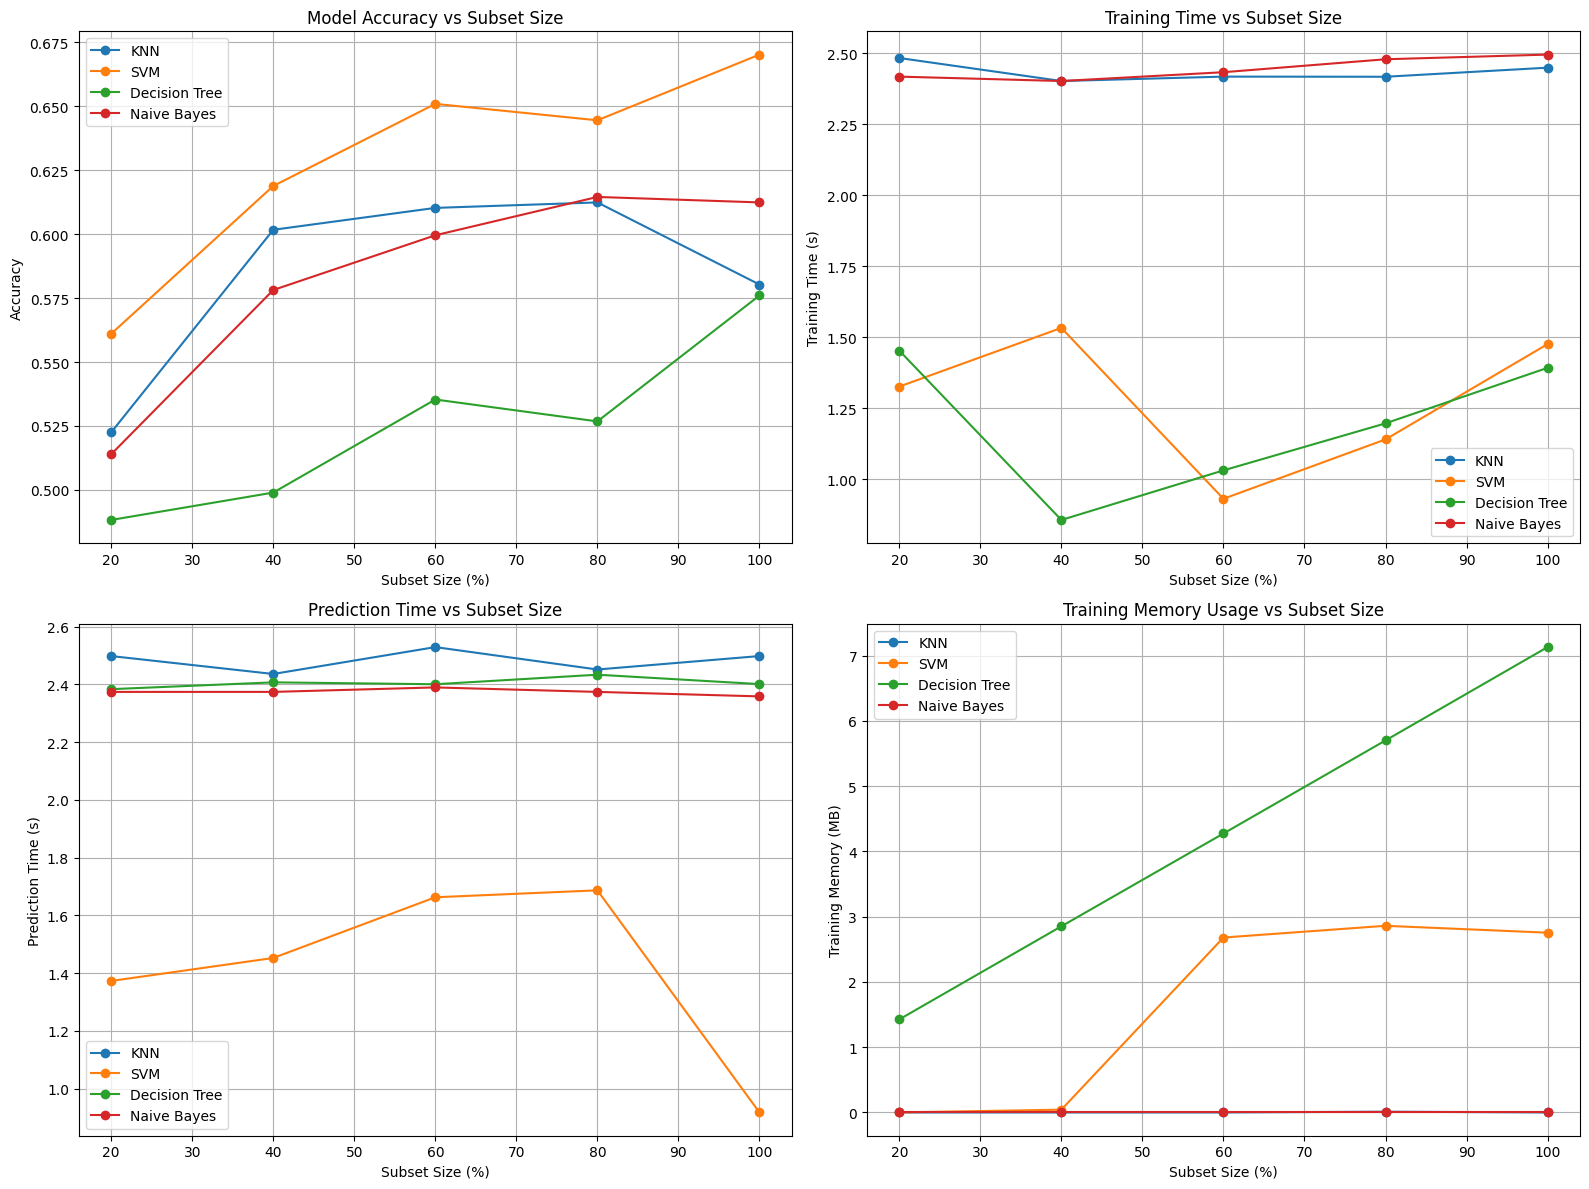

In [49]:
import pandas as pd

# Convert scalability results to a DataFrame for better visualization
results_data = []
for model_name, results in scalability_results.items():
    for result in results:
        results_data.append({
            'Model': model_name,
            'Subset': result['subset'],
            'Accuracy': result['accuracy'],
            'Training Time (s)': result['training_time'],
            'Training Memory (MB)': result['training_memory_MB'],
            'Prediction Time (s)': result['prediction_time']
        })

results_df = pd.DataFrame(results_data)

# Display the results
print("Model Performance Results:")
display(results_df)

# Create a 2x2 grid of subplots to display the charts together
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy vs Subset Size
for model_name in results_df['Model'].unique():
    model_data = results_df[results_df['Model'] == model_name]
    axs[0, 0].plot(model_data['Subset'] * 100, model_data['Accuracy'], marker='o', label=model_name)
axs[0, 0].set_title('Model Accuracy vs Subset Size')
axs[0, 0].set_xlabel('Subset Size (%)')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Training Time vs Subset Size
for model_name in results_df['Model'].unique():
    model_data = results_df[results_df['Model'] == model_name]
    axs[0, 1].plot(model_data['Subset'] * 100, model_data['Training Time (s)'], marker='o', label=model_name)
axs[0, 1].set_title('Training Time vs Subset Size')
axs[0, 1].set_xlabel('Subset Size (%)')
axs[0, 1].set_ylabel('Training Time (s)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Prediction Time vs Subset Size
for model_name in results_df['Model'].unique():
    model_data = results_df[results_df['Model'] == model_name]
    axs[1, 0].plot(model_data['Subset'] * 100, model_data['Prediction Time (s)'], marker='o', label=model_name)
axs[1, 0].set_title('Prediction Time vs Subset Size')
axs[1, 0].set_xlabel('Subset Size (%)')
axs[1, 0].set_ylabel('Prediction Time (s)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Training Memory Usage vs Subset Size
for model_name in results_df['Model'].unique():
    model_data = results_df[results_df['Model'] == model_name]
    axs[1, 1].plot(model_data['Subset'] * 100, model_data['Training Memory (MB)'], marker='o', label=model_name)
axs[1, 1].set_title('Training Memory Usage vs Subset Size')
axs[1, 1].set_xlabel('Subset Size (%)')
axs[1, 1].set_ylabel('Training Memory (MB)')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# Optimize Models with GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'weights': ['uniform', 'distance']
    },
    'SVM': [
        {'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10, 100]},
        {'kernel': ['rbf'], 'C': [0.01, 0.1, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.01, 0.1, 1, 10, 100]}
    ],
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]
    }
}

# Perform GridSearchCV for each model
optimized_models = {}
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    if param_grids[model_name]:
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        optimized_models[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        # Use the default model if no parameters to tune
        optimized_models[model_name] = model.fit(X_train, y_train)

Optimizing KNN...
Best parameters for KNN: {'n_neighbors': 13, 'weights': 'distance'}
Optimizing SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Optimizing Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Optimizing Naive Bayes...
Best parameters for Naive Bayes: {'alpha': 0.1}


# Compare Confusion Matrices: Original vs Optimized Models

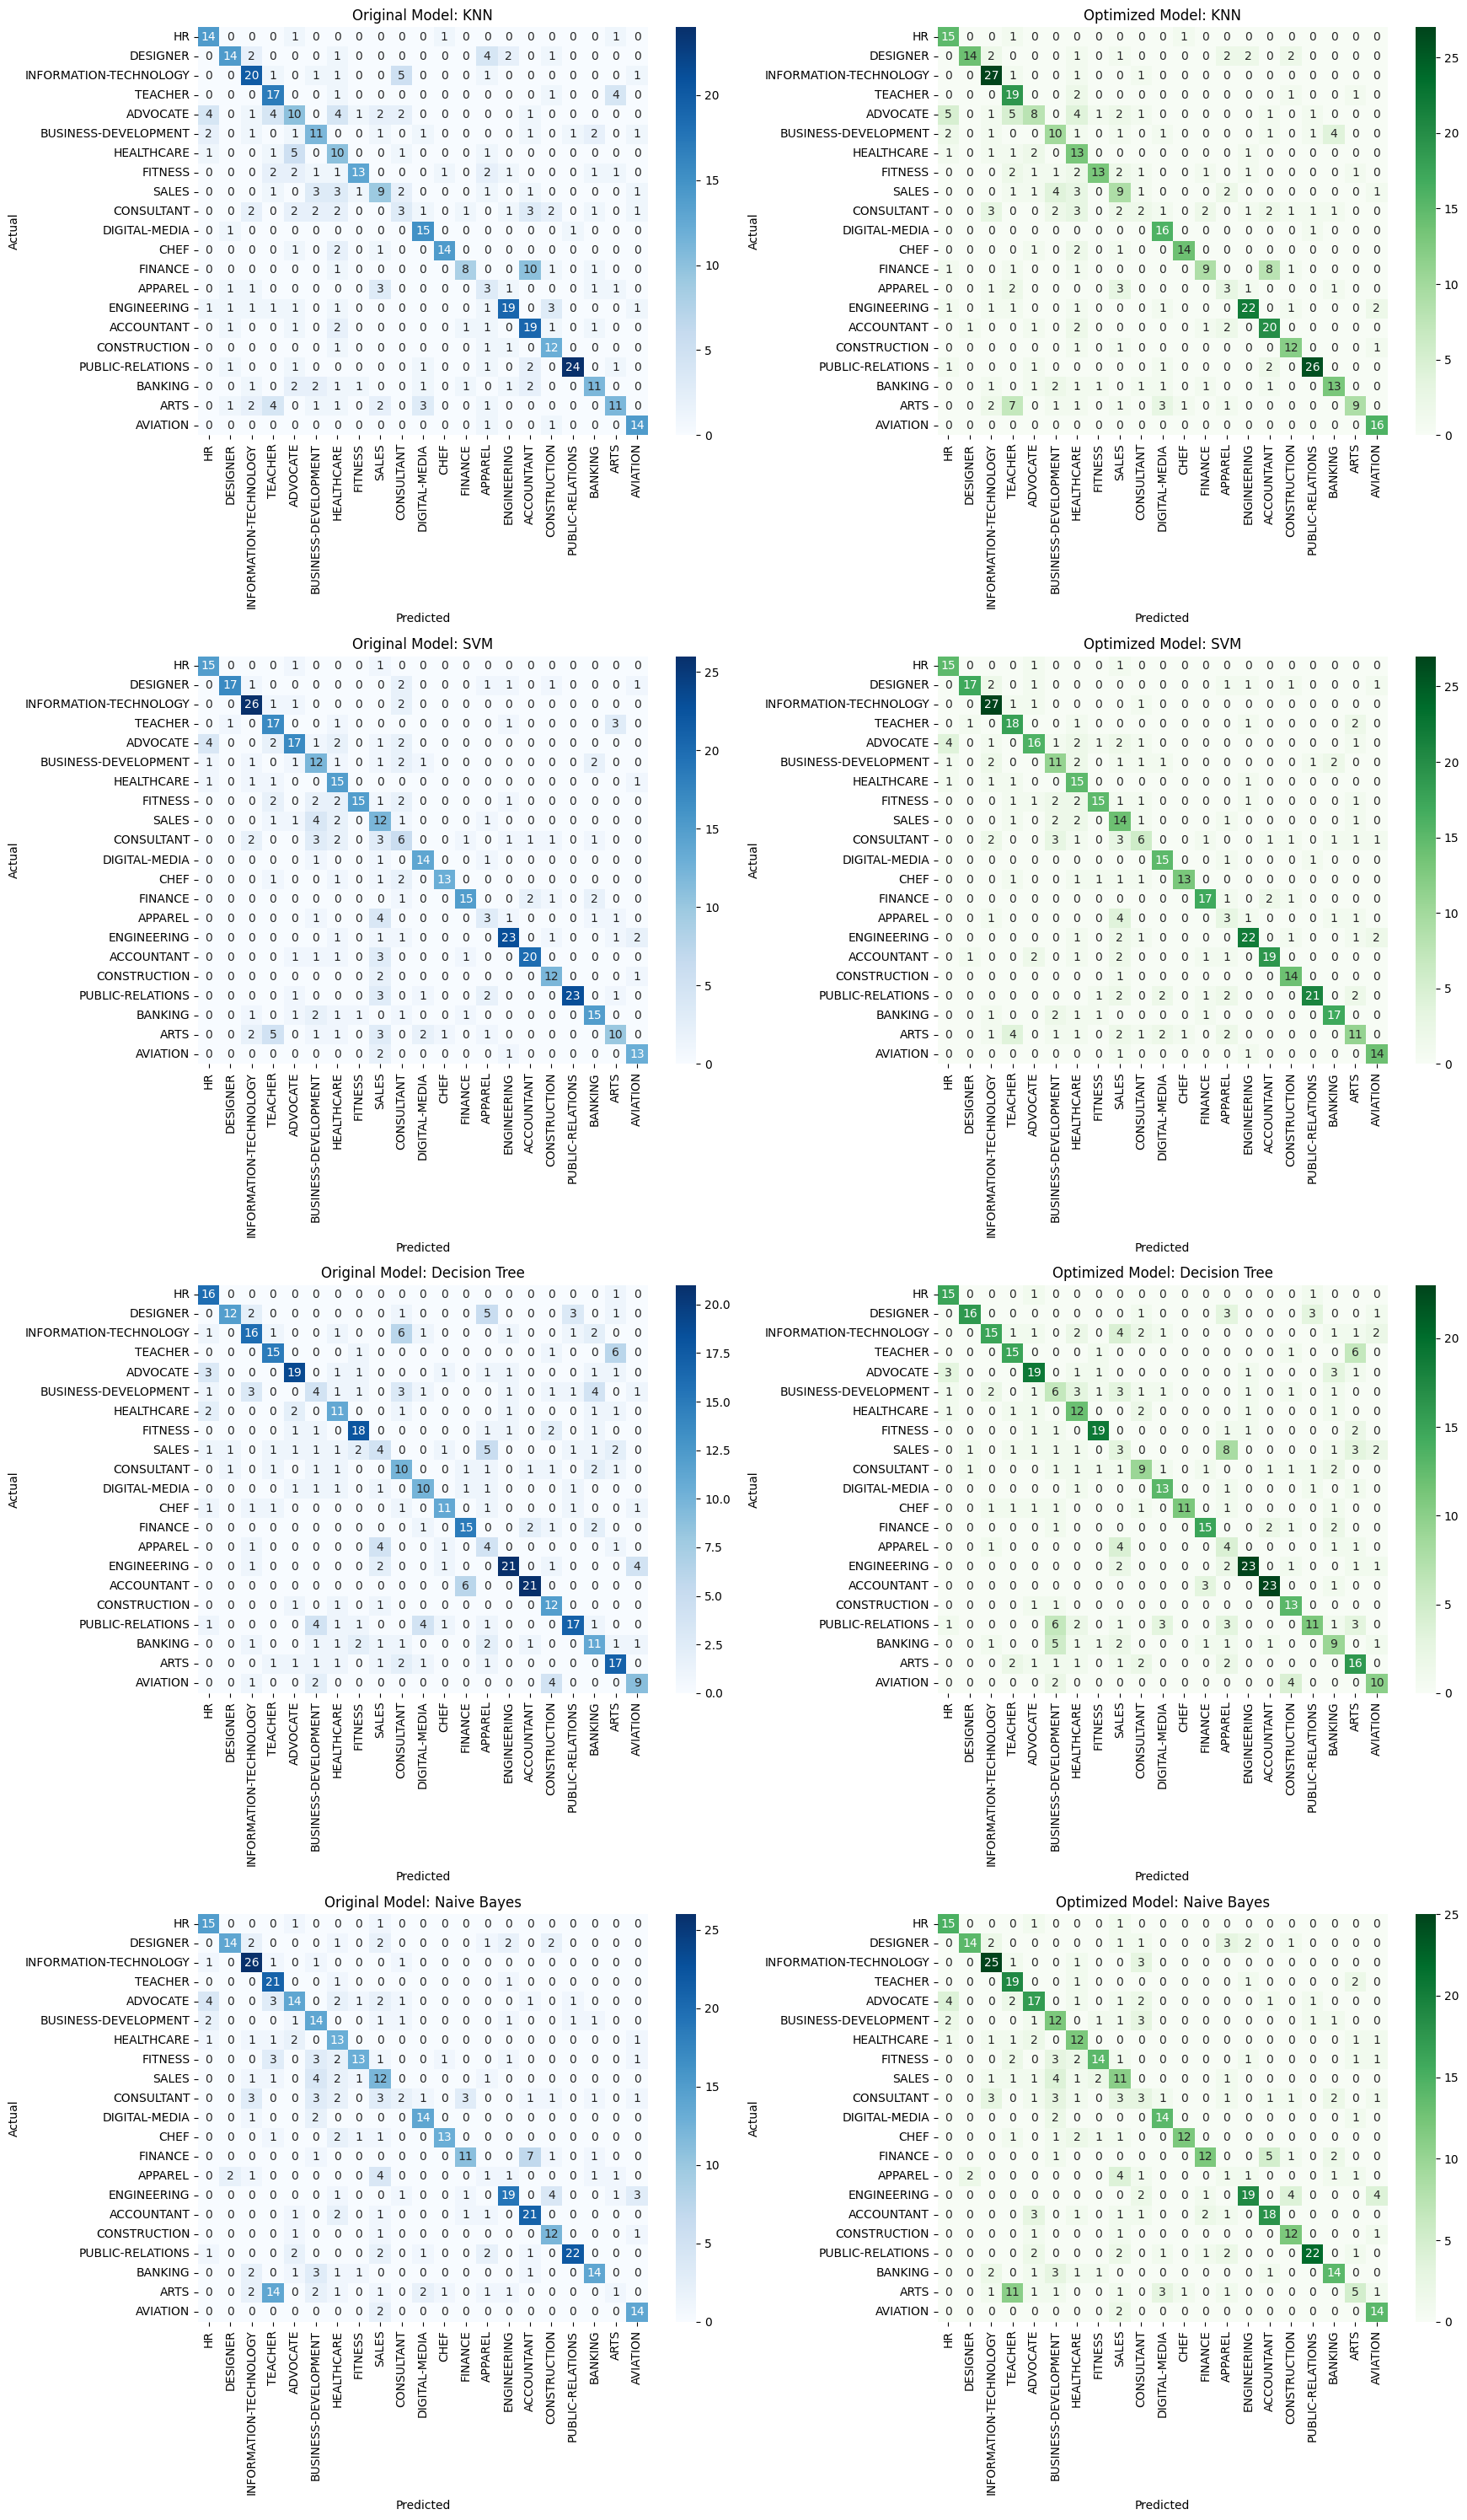

In [53]:
from sklearn.metrics import confusion_matrix

# Plot confusion matrices for original and optimized models side by side
fig, axes = plt.subplots(4, 2, figsize=(18, 30))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    # Original model confusion matrix
    y_pred_original = model.fit(X_train, y_train).predict(X_test)
    cm_original = confusion_matrix(y_test, y_pred_original, labels=y.unique())
    sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique(), ax=axes[i * 2])
    axes[i * 2].set_title(f"Original Model: {model_name}")
    axes[i * 2].set_xlabel("Predicted")
    axes[i * 2].set_ylabel("Actual")

    # Optimized model confusion matrix
    y_pred_optimized = optimized_models[model_name].predict(X_test)
    cm_optimized = confusion_matrix(y_test, y_pred_optimized, labels=y.unique())
    sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Greens', xticklabels=y.unique(), yticklabels=y.unique(), ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f"Optimized Model: {model_name}")
    axes[i * 2 + 1].set_xlabel("Predicted")
    axes[i * 2 + 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Retest Metrics with Optimized Models

In [54]:
# Retest metrics with optimized models on subsets from 20% to 100% of the training data
optimized_results = {}
for subset in [0.2, 0.4, 0.6, 0.8, 1.0]:
    print(f"\nEvaluating optimized models on {int(subset * 100)}% of the training data...")
    subset_size = int(len(X_train) * subset)
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]
    subset_results = {}
    
    for model_name, model in optimized_models.items():
        print(f"Evaluating optimized {model_name}...")
        results = evaluate_model(model, X_train_subset, X_test, y_train_subset, y_test)
        subset_results[model_name] = results
    
    optimized_results[subset] = subset_results

# Display optimized results
for subset, models_results in optimized_results.items():
    print(f"\nOptimized Results for {int(subset*100)}% of data:")
    for model_name, results in models_results.items():
        print(f"\n{model_name}:")
        print(results)


Evaluating optimized models on 20% of the training data...
Evaluating optimized KNN...
Evaluating optimized SVM...
Evaluating optimized Decision Tree...
Evaluating optimized Naive Bayes...

Evaluating optimized models on 40% of the training data...
Evaluating optimized KNN...
Evaluating optimized SVM...
Evaluating optimized Decision Tree...
Evaluating optimized Naive Bayes...

Evaluating optimized models on 60% of the training data...
Evaluating optimized KNN...
Evaluating optimized SVM...
Evaluating optimized Decision Tree...
Evaluating optimized Naive Bayes...

Evaluating optimized models on 80% of the training data...
Evaluating optimized KNN...
Evaluating optimized SVM...
Evaluating optimized Decision Tree...
Evaluating optimized Naive Bayes...

Evaluating optimized models on 100% of the training data...
Evaluating optimized KNN...
Evaluating optimized SVM...
Evaluating optimized Decision Tree...
Evaluating optimized Naive Bayes...

Optimized Results for 20% of data:

KNN:
{'train

# Analyze Optimized Results

Optimized Model Performance Results Over All Subsets:


,Subset Size,Model,Accuracy,Training Time (s),Prediction Time (s),Training Memory (MB)
0,20.0,KNN,0.576017,2.452607,2.466619,0.000000
1,20.0,SVM,0.603854,1.930658,2.451105,0.023438
2,20.0,Decision Tree,0.483940,1.422721,2.358026,1.425781
3,20.0,Naive Bayes,0.580300,2.386549,2.358025,0.000000
4,40.0,KNN,0.599572,2.402563,2.420078,0.000000
5,40.0,SVM,0.642398,1.454750,1.300117,0.015625
6,40.0,Decision Tree,0.518201,1.653419,2.356524,2.851562
7,40.0,Naive Bayes,0.605996,2.402063,2.358025,0.000000
8,60.0,KNN,0.627409,2.387052,2.420076,0.000000
9,60.0,SVM,0.668094,1.642911,1.306622,0.265625


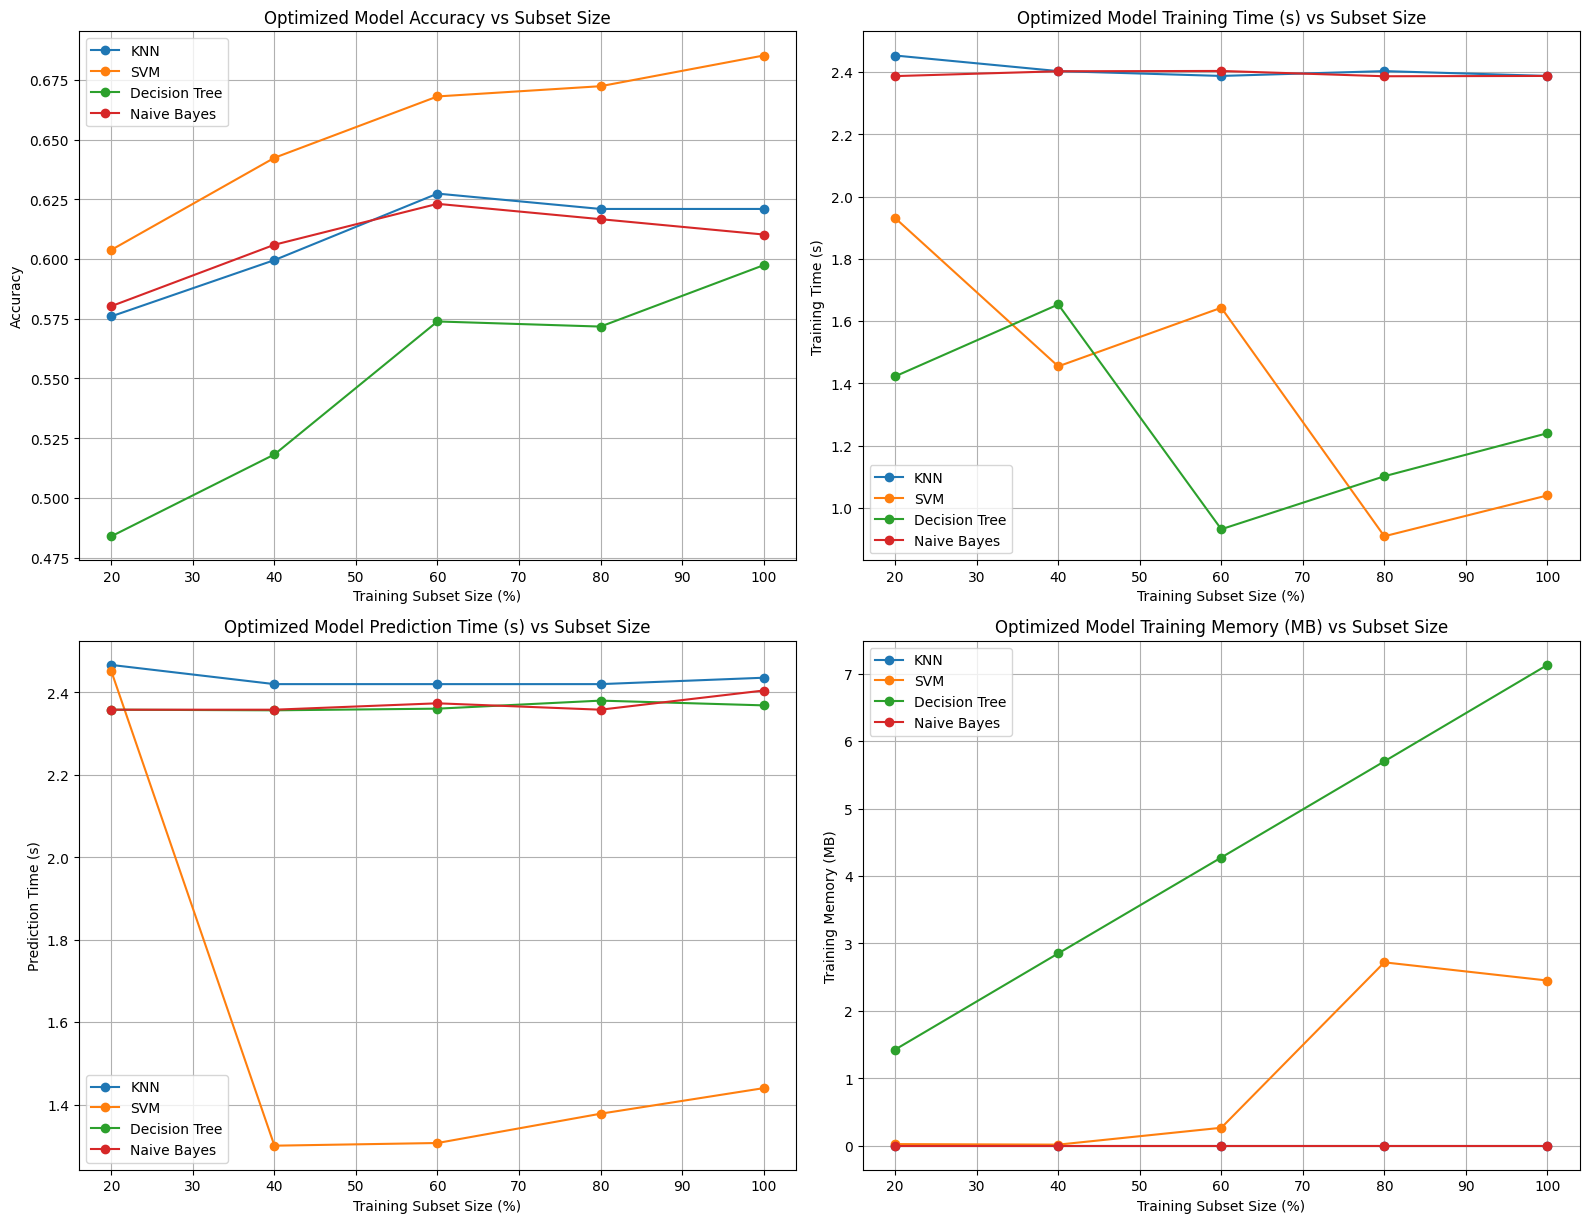

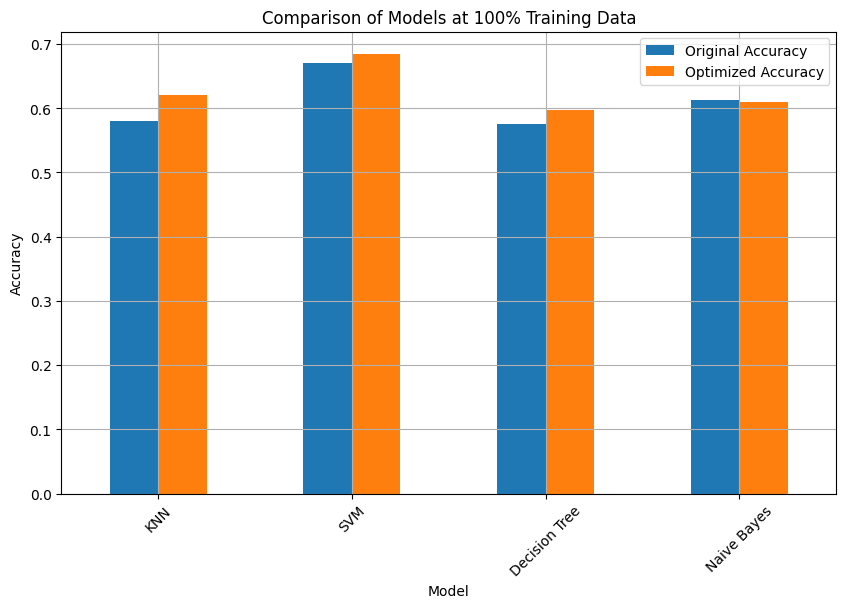

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate optimized results over all subsets including memory metrics
agg_data = []
for subset, models_results in optimized_results.items():
    for model_name, res in models_results.items():
        agg_data.append({
            'Subset Size': subset * 100,
            'Model': model_name,
            'Accuracy': res['accuracy'],
            'Training Time (s)': res['training_time'],
            'Prediction Time (s)': res['prediction_time'],
            'Training Memory (MB)': res['training_memory_MB']
        })

optimized_results_df_all = pd.DataFrame(agg_data)

# Display the aggregated optimized results
print("Optimized Model Performance Results Over All Subsets:")
display(optimized_results_df_all)

# Plot trends for each model over subset size in a grid (3 rows x 2 cols)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

metric_info = [
    ('Accuracy', 'Accuracy'),
    ('Training Time (s)', 'Training Time (s)'),
    ('Prediction Time (s)', 'Prediction Time (s)'),
    ('Training Memory (MB)', 'Training Memory (MB)') 
]

# Loop over each metric and plot each model's trend
for i, (metric, ylabel) in enumerate(metric_info):
    ax = axes[i]
    for model in optimized_results_df_all['Model'].unique():
        subset_data = optimized_results_df_all[optimized_results_df_all['Model'] == model]
        ax.plot(subset_data['Subset Size'], subset_data[metric], marker='o', label=model)
    ax.set_title(f'Optimized Model {metric} vs Subset Size')
    ax.set_xlabel('Training Subset Size (%)')
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

# Remove unused subplot if any (here, the 6th plot is not needed)
if len(metric_info) < len(axes):
    fig.delaxes(axes[-1])
    fig.delaxes(axes[-2])
plt.tight_layout()
plt.show()

# Compare results for the models using the full (100%) training data

# Filter original results for subset 100%
orig_100 = results_df[results_df['Subset'] == 1.0].set_index('Model')

# Filter optimized results for subset size of 100%
opt_100 = optimized_results_df_all[optimized_results_df_all['Subset Size'] == 100].set_index('Model')

# Build a comparison DataFrame with accuracies from original and optimized models
comparison_df = pd.DataFrame({
    'Original Accuracy': orig_100['Accuracy'],
    'Optimized Accuracy': opt_100['Accuracy']
}).reset_index()

# Plot the comparison
comparison_df.plot(x='Model', kind='bar', figsize=(10, 6),
                     title='Comparison of Models at 100% Training Data',
                     ylabel='Accuracy', xlabel='Model', rot=45, grid=True)
plt.show()

# Build and Train a BERT Model

In [ ]:
import time
from memory_profiler import memory_usage
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from sklearn.metrics import accuracy_score
import pandas as pd

def tokenize_data(texts, labels, max_len):
    encodings = tokenizer(texts.tolist(), truncation=True, padding='max_length', max_length=max_len, return_tensors='tf')
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    return dataset

# Set maximum sequence length for BERT
max_len = 128
# Determine number of labels (categories)
num_labels = df['Category'].nunique()  

bert_results = []
subsets = [0.2, 0.4, 0.6, 0.8, 1.0]

for subset in subsets:
    print(f"\nTraining BERT on {int(subset*100)}% of the training data...")
    subset_size = int(len(X_train) * subset)
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train[:subset_size]
    
    # Prepare TensorFlow datasets for training and testing
    train_dataset = tokenize_data(X_train_subset, y_train_subset, max_len).shuffle(1000).batch(16)
    test_dataset = tokenize_data(X_test, y_test, max_len).batch(16)
    
    # Load and compile the BERT model
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    
    # Train the model for 3 epochs and capture training time and memory usage
    start_time = time.time()
    train_mem = memory_usage((lambda: model.fit(train_dataset, epochs=3, verbose=0)), interval=0.1)
    training_time = time.time() - start_time
    training_memory = max(train_mem) - min(train_mem)
    
    # Measure prediction time and memory usage on the test set
    start_time = time.time()
    pred_mem = memory_usage((lambda: model.predict(test_dataset)), interval=0.1)
    prediction_time = time.time() - start_time
    prediction_memory = max(pred_mem) - min(pred_mem)
    
    # Evaluate accuracy
    preds = model.predict(test_dataset)
    y_pred = tf.argmax(preds.logits, axis=1).numpy()
    accuracy = accuracy_score(y_test, y_pred)
    
    bert_results.append({
       'Subset Size': subset * 100,
       'Model': 'BERT',
       'Accuracy': accuracy,
       'Training Time (s)': training_time,
       'Training Memory (MB)': training_memory,
       'Prediction Time (s)': prediction_time
    })

# Aggregate BERT results into a DataFrame
bert_results_df = pd.DataFrame(bert_results)

# Combine with optimized_results_df_all from previous models
combined_df = pd.concat([optimized_results_df_all, bert_results_df], ignore_index=True)

print("Combined Model Performance Results:")
display(combined_df)


Training BERT on 20% of the training data...


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


30/30 [==============================] - 31s 1s/step

Training BERT on 40% of the training data...


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


30/30 [==============================] - 32s 1s/step

Training BERT on 60% of the training data...


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


30/30 [==============================] - 32s 1s/step

Training BERT on 80% of the training data...


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


30/30 [==============================] - 32s 1s/step

Training BERT on 100% of the training data...


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


30/30 [==============================] - 34s 1s/step
Combined Model Performance Results:


,Subset Size,Model,Accuracy,Training Time (s),Prediction Time (s),Training Memory (MB)
0,20.0,KNN,0.563169,2.384548,2.435591,0.000000
1,20.0,SVM,0.595289,1.622395,1.494282,0.000000
2,20.0,Decision Tree,0.539615,1.534317,2.323495,7.117188
3,20.0,Naive Bayes,0.471092,2.384047,2.342511,0.000000
4,40.0,KNN,0.605996,2.338508,1.260082,0.000000
5,40.0,SVM,0.646681,1.333145,0.879755,13.125000
6,40.0,Decision Tree,0.576017,0.952818,2.363530,14.250000
7,40.0,Naive Bayes,0.548180,2.461113,2.404565,0.000000
8,60.0,KNN,0.603854,2.400562,1.292110,0.000000
9,60.0,SVM,0.670236,2.119320,1.159996,12.132812


# BERT vs Traditional Models

,Subset Size,Model,Accuracy,Training Time (s),Prediction Time (s),Training Memory (MB)
0,20.0,KNN,0.563169,2.384548,2.435591,0.000000
1,20.0,SVM,0.595289,1.622395,1.494282,0.000000
2,20.0,Decision Tree,0.539615,1.534317,2.323495,7.117188
3,20.0,Naive Bayes,0.471092,2.384047,2.342511,0.000000
20,20.0,BERT,0.483940,236.953992,33.594851,1601.195312
4,40.0,KNN,0.605996,2.338508,1.260082,0.000000
5,40.0,SVM,0.646681,1.333145,0.879755,13.125000
6,40.0,Decision Tree,0.576017,0.952818,2.363530,14.250000
7,40.0,Naive Bayes,0.548180,2.461113,2.404565,0.000000
21,40.0,BERT,0.695931,470.665503,34.438576,1993.894531


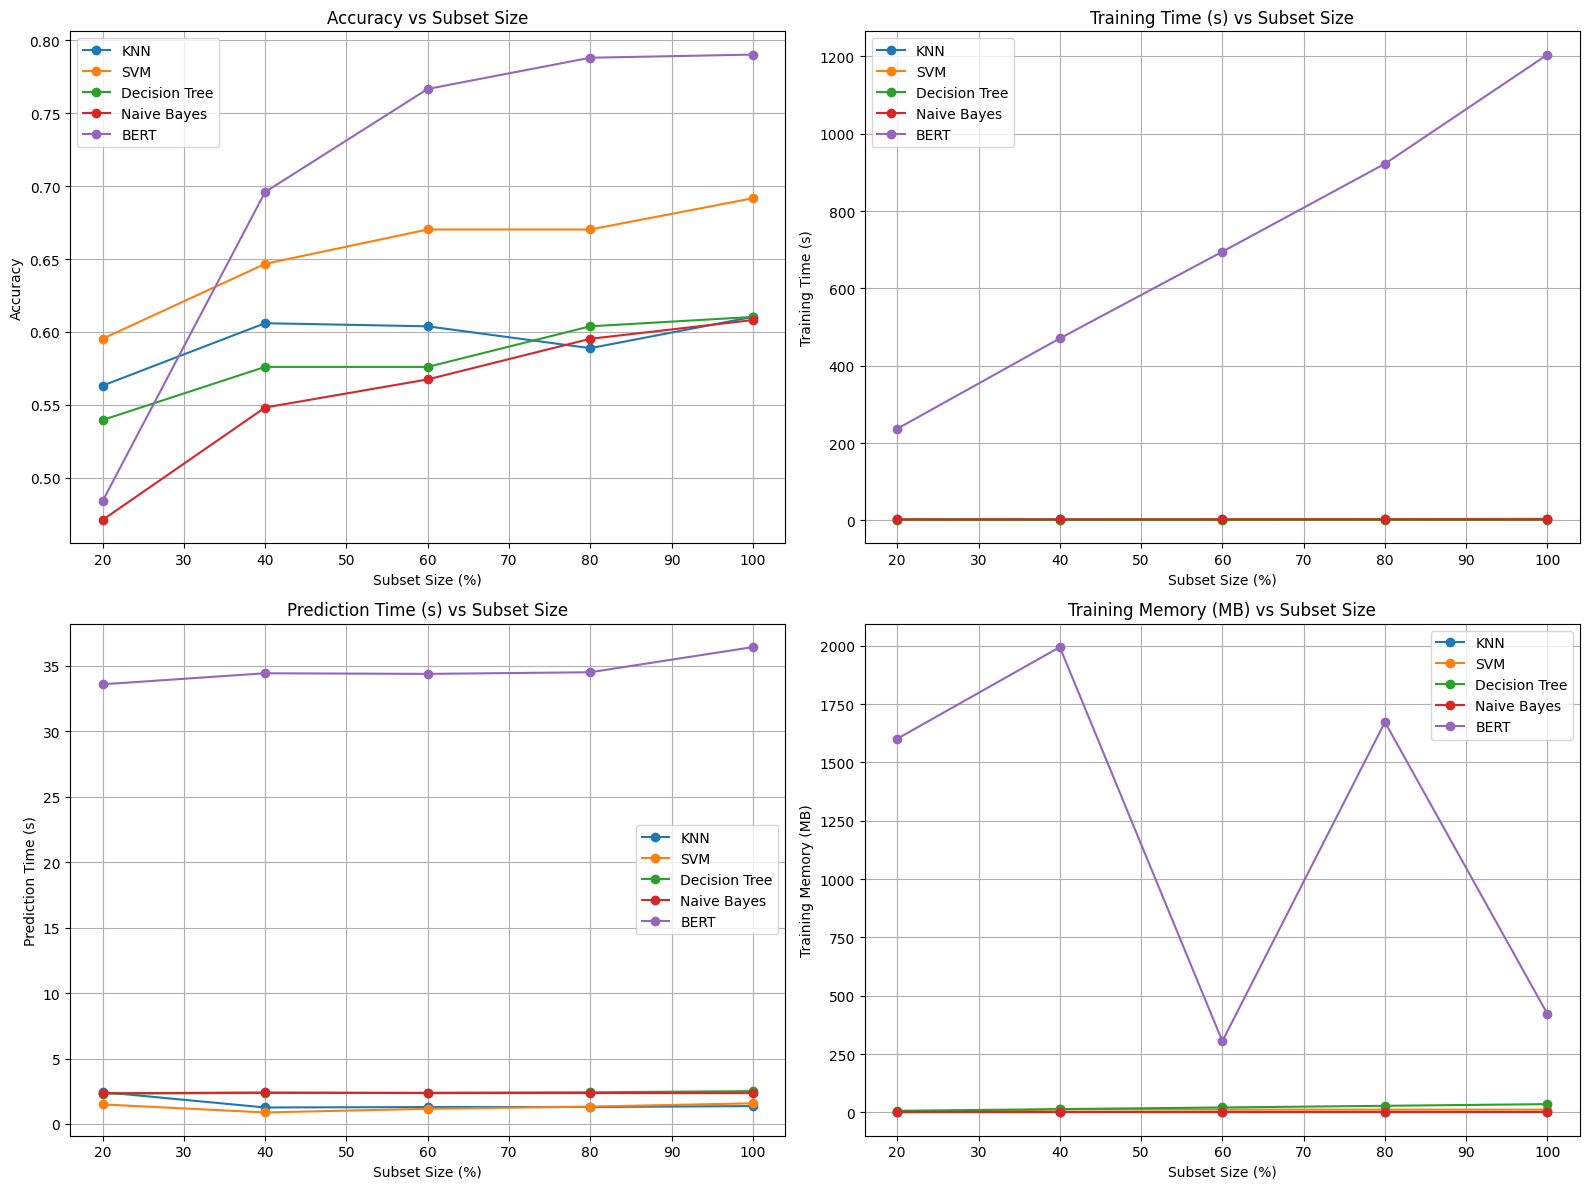

In [56]:
import matplotlib.pyplot as plt

combined_df.sort_values(by='Subset Size', inplace=True)
display(combined_df)

# Define the metrics to visualize
metrics = {
    'Accuracy': 'Accuracy',
    'Training Time (s)': 'Training Time (s)',
    'Prediction Time (s)': 'Prediction Time (s)',
    'Training Memory (MB)': 'Training Memory (MB)'
}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (metric, ylabel) in enumerate(metrics.items()):
    ax = axes[i]
    for model in combined_df['Model'].unique():
        model_data = combined_df[combined_df['Model'] == model]
        ax.plot(model_data['Subset Size'], model_data[metric], marker='o', label=model)
    ax.set_title(f'{metric} vs Subset Size')
    ax.set_xlabel('Subset Size (%)')
    ax.set_ylabel(ylabel)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()